In [ ]:
# 1 Import
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 2 Download data
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

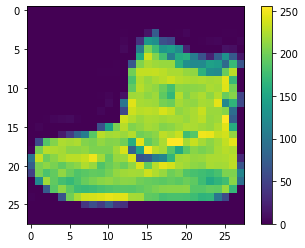

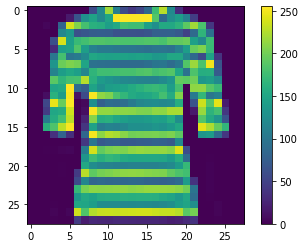

In [ ]:
# 3 Explore the data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

plt.figure()
plt.imshow(train_images[26])
plt.colorbar()
plt.gca().grid(False)


In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

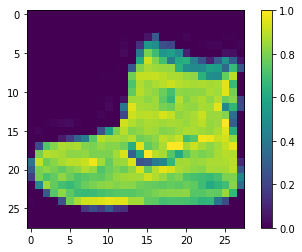

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

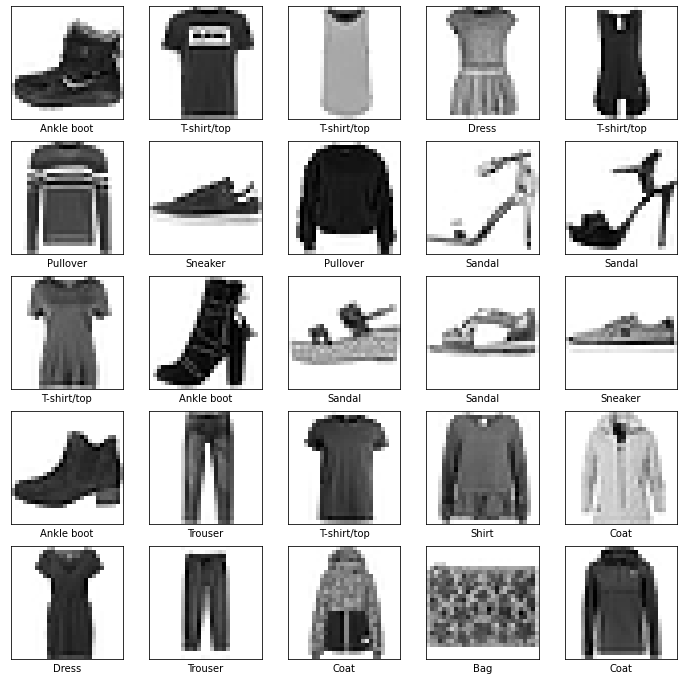

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.6293 - accuracy: 0.7825
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3948 - accuracy: 0.8593
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3423 - accuracy: 0.8758
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3218 - accuracy: 0.8817
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2980 - accuracy: 0.8885
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2814 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2701 - accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2588 - accuracy: 0.9032
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2439 - accuracy: 0.9091
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.237

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4370 - accuracy: 0.8484
Test accuracy: 0.8483999967575073


'Pullover'

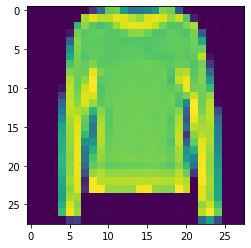

In [ ]:
predictions = model.predict(test_images)
predicted = (predictions[99])
plt.figure()
plt.imshow(test_images[99])
class_names[np.argmax(predicted)]

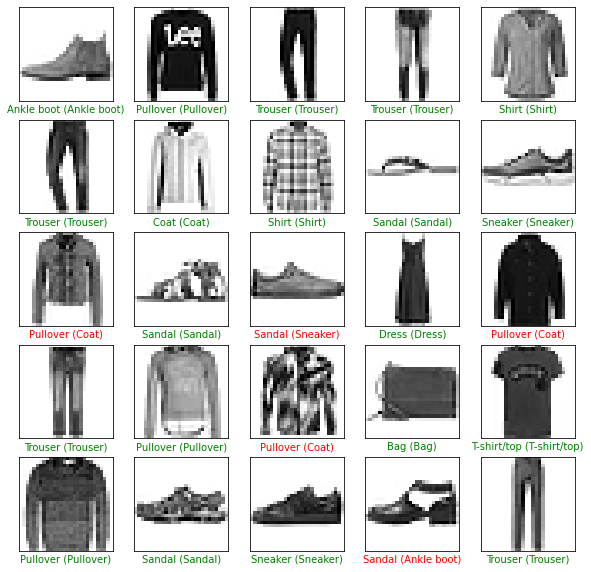

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label],
                                  class_names[true_label]),
                                  color=color)